<a href="https://colab.research.google.com/github/vikhyat-3/FakeNewsDetection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Required Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Read Data

In [4]:
trueData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of True.csv")
fakeData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Fake.csv")

In [5]:
fakeData.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
trueData['real'] = 1
fakeData['real'] = 0

In [7]:
trueData.head()


,title,text,subject,date,real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df=pd.concat([fakeData,trueData])

In [9]:
df.real.value_counts()


0    23481
1    21417
Name: real, dtype: int64

In [10]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

#### Data Preprocessing

In [11]:
def cleanData(row):
  row = row.lower() #Convert all text to lowercase
  row = re.sub('[^a-zA-Z]', ' ', row) #Remove punctuation, special characters etc
  token = row.split()
  removeStop= [i for i in token if i not in stopwords] #Remove all stopwords
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in removeStop] #Lemmatize the words
  cleaned_string = ""
  for word in lemm_text:
    cleaned_string+=word
    cleaned_string+= ' '
  return cleaned_string
df['cleaned_data'] = df['text'].apply(lambda x:cleanData(x))
df




,title,text,subject,date,real,cleaned_data
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used annual christmas day message...
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,brussels reuters nato ally tuesday welcomed pr...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,london reuters lexisnexis provider legal regul...
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,minsk reuters shadow disused soviet era factor...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,moscow reuters vatican secretary state cardina...


#### Split the data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned_data'], df['real'], test_size=0.2, random_state=42)
X_test

22216    st century wire say ben stein reputable profes...
4436     washington reuters u president donald trump re...
1526     reuters puerto rico governor ricardo rossello ...
1377     monday donald trump embarrassed country accide...
8995     glasgow scotland reuters u presidential candid...
                               ...                        
18638    riyadh reuters saudi arabia public prosecutor ...
4068     donald trump liar say anything never ending qu...
22498    st century wire say learned week u president b...
14658    course secretary state everything control repo...
15236     nuke nuke crazy people clue wakey wakey america 
Name: cleaned_data, Length: 8980, dtype: object

#### Vectorizing the data using TFIDF vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase = False)
vec_train_data = vectorizer.fit_transform(X_train)
vec_test_data = vectorizer.transform(X_test)
vec_train_data


<35918x97549 sparse matrix of type '<class 'numpy.float64'>'
	with 5639060 stored elements in Compressed Sparse Row format>

#### Multinomial Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB
MNB_clf = MultinomialNB()
MNB_clf.fit(vec_train_data, Y_train)
MNB_pred = MNB_clf.predict(vec_test_data)


In [15]:
from sklearn.metrics import accuracy_score
MNB_accuracy = accuracy_score(Y_test, MNB_pred)*100
MNB_accuracy


93.44097995545657

#### Logistic Regression Classifier

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
LR_clf = LogisticRegression()
LR_clf.fit(vec_train_data, Y_train)
LR_pred = LR_clf.predict(vec_test_data)
LR_accuracy = accuracy_score(Y_test, LR_pred)*100
LR_accuracy


98.64142538975501

#### Decision Tree Classifier

In [17]:
from sklearn.svm import LinearSVC

SVM_clf = LinearSVC()
SVM_clf.fit(vec_train_data, Y_train)
SVM_pred = SVM_clf.predict(vec_test_data)
SVM_accuracy = accuracy_score(Y_test, SVM_pred)*100
SVM_accuracy

99.47661469933185

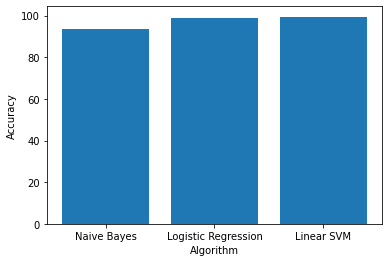

In [18]:
import matplotlib.pyplot as plt
x = ['Naive Bayes', 'Logistic Regression', 'Linear SVM']
y = [MNB_accuracy, LR_accuracy, SVM_accuracy]
plt.bar(x,y)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

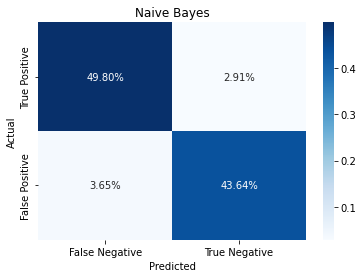

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
MNB_confusion_matrix = confusion_matrix(Y_test, MNB_pred)

ax = sns.heatmap(MNB_confusion_matrix/np.sum(MNB_confusion_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Naive Bayes');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive' ])
plt.show()



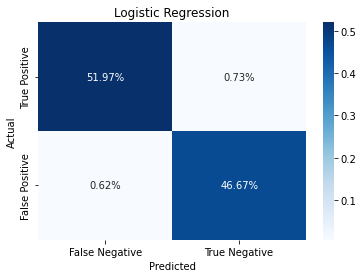

In [20]:
LR_confusion_matrix = confusion_matrix(Y_test, LR_pred)

ax = sns.heatmap(LR_confusion_matrix/np.sum(LR_confusion_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Logistic Regression');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive' ])
plt.show()

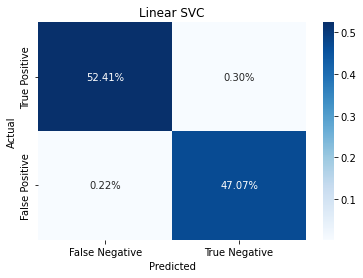

In [21]:
SVM_confusion_matrix = confusion_matrix(Y_test, SVM_pred)

ax = sns.heatmap(SVM_confusion_matrix/np.sum(SVM_confusion_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Linear SVC');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive' ])
plt.show()

In [22]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),MultinomialNB())
text_model.fit(X_train,Y_train)
y_pred=text_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [23]:
import joblib
joblib.dump(text_model, 'MNB')

['MNB']

In [24]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def cleanData(row):
  row = row.lower() #Convert all text to lowercase
  row = re.sub('[^a-zA-Z]', ' ', row) #Remove punctuation, special characters etc
  token = row.split()
  removeStop= [i for i in token if i not in stopwords] #Remove all stopwords
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in removeStop] #Lemmatize the words
  cleaned_string = ""
  for word in lemm_text:
    cleaned_string+=word
    cleaned_string+= ' '
  return cleaned_string


model = joblib.load('MNB')
st.title("Fake News Detector")
ip = st.text_input("Enter the news: ")
op = model.predict([cleanData(ip)])
final  = ''
if st.button('Predict'):
  if op == 1:
    final = 'Real News'
  else:
    final = 'Fake News'
st.title(final)

Writing app.py


In [25]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 4.3 MB/s 
     |████████████████████████████████| 181 kB 76.3 MB/s 
     |████████████████████████████████| 4.3 MB 51.5 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 164 kB 63.4 MB/s 
     |████████████████████████████████| 111 kB 61.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 131 kB 36.2 MB/s 
     |████████████████████████████████| 793 kB 26.9 MB/s 
     |████████████████████████████████| 130 kB 67.2 MB/s 
     |████████████████████████████████| 428 kB 69.0 MB/s 
     |████████████████████████████████| 381 kB 60.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [26]:
!streamlit run app.py & npx localtunnel --port 8501 

2022-05-25 04:06:56.143 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.80.132.53:8501

npx: installed 22 in 3.966s
your url is: https://floppy-worlds-shine-34-80-132-53.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-

In [27]:
X_test[4436]

'washington reuters u president donald trump removed chief strategist steve bannon national security council wednesday reversing controversial decision early year give political adviser unprecedented role security discussion trump overhaul nsc confirmed white house official also elevated general joseph dunford chairman joint chief staff dan coat director national intelligence head u intelligence agency official said change move nsc back core function supposed also appears mark victory national security adviser h r mcmaster told national security expert felt battle death bannon others white house staff vice president mike penny said bannon would continue play important role policy played shake routine natural evolution ensure national security council organized way best serf president resolving making difficult decision penny said fox news bannon said statement succeeded returning nsc back traditional role coordinating foreign policy rather running cited president barack obama national 